# Analysis on IPL dataset


In [2]:
## Analysis that we have in this notebooks are
## Seeing the top then Players who have won the max MOM award using bar plot.
## Bar plot of teams whon won the IPL season.
## Pie chart of the toss decision.
## Histogram of the won by runs margin
## Top five teams won batting first.
## Histogram of the won by wickets margin.
## Top five teams won batting second.
## Number of matches played in each IPL season.
## Number of matches played by each IPL team so far.
## Number of sixes hit by each team so far.
## Top 10 Run scorer so far.
## Top 10 maximum strike rate of batter.
## Orange cap holder of each season.
## Purple cap holder of each season.
## Contribution of 1's, 2's, 3's, 4's, 6's in total teams score of different teams including dot balls.

In [3]:
# Importing Libraries in python
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Loading the IPL matches dataset

In [4]:
ipl=pd.read_csv('ipl_matches_2008_2022.csv')

### Having a glance of the first five records of the dataset

In [5]:
ipl.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [6]:
ipl['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

### Making a function to manipulate the data 

In [9]:
def change_name(x):
    if x=='Punjab Kings':
        return 'Kings XI Punjab'
    elif x== 'Rising Pune Supergiant':
        return 'Rising Pune Supergiants'
    elif x=='Pune Warriors':
        return 'Rising Pune Supergiant'
    elif x=='Delhi Daredevils':
        return 'Delhi Capitals'
    else:
        return x
ipl['Team1']=ipl['Team1'].apply(change_name)
ipl['Team2']=ipl['Team2'].apply(change_name)
ipl['TossWinner']=ipl['TossWinner'].apply(change_name)
ipl['WinningTeam']=ipl['WinningTeam'].apply(change_name)

In [10]:
ipl['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Mumbai Indians', 'Rising Pune Supergiants',
       'Gujarat Lions', 'Deccan Chargers', 'Kochi Tuskers Kerala'],
      dtype=object)

In [11]:
ipl['WinningTeam'].value_counts() # number of times the IPL teams have won the matches

Mumbai Indians                 131
Chennai Super Kings            121
Kolkata Knight Riders          114
Royal Challengers Bangalore    109
Delhi Capitals                 103
Kings XI Punjab                101
Rajasthan Royals                96
Sunrisers Hyderabad             75
Deccan Chargers                 29
Rising Pune Supergiants         27
Gujarat Lions                   13
Gujarat Titans                  12
Lucknow Super Giants             9
Kochi Tuskers Kerala             6
Name: WinningTeam, dtype: int64

#### Looking at the number of rows and columns in the dataset

In [13]:
ipl.shape

(950, 20)

950 matches have been played in IPL so far.

### Seeing top 10 Player who have won the maximu MOM awards.

In [14]:
ipl['Player_of_Match'].value_counts()[0:10]

AB de Villiers    25
CH Gayle          22
DA Warner         18
RG Sharma         18
MS Dhoni          17
YK Pathan         16
SR Watson         16
KA Pollard        14
SK Raina          14
V Kohli           14
Name: Player_of_Match, dtype: int64

## Making Bar plot for the top 10 player of the matches

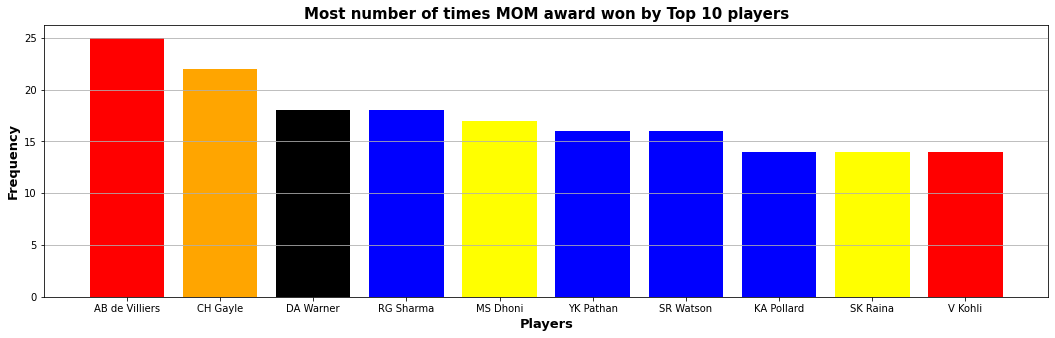

In [15]:
plt.figure(figsize=(18,5))
plt.grid(visible=True,axis='y')
plt.xlabel("Players",fontsize=13,fontweight='bold')
plt.ylabel('Frequency',fontsize=13,fontweight='bold')
plt.title('Most number of times MOM award won by Top 10 players',fontsize=15,fontweight='bold')
plt.bar(list(ipl['Player_of_Match'].value_counts()[0:10].keys()),list(ipl['Player_of_Match'].value_counts()[0:10]),color=['red','orange','black','blue','yellow','blue','blue','blue','yellow','red'])
plt.show()

Analysis: So we can see that AB de Villiers has won the MOM award maximum number of times so far.

##### Storing final matches data in final variable

In [16]:
final=ipl[ipl['MatchNumber'] == 'Final']

# Season Winner

In [17]:
final[['Season','WinningTeam']]

,Season,WinningTeam
0,2022,Gujarat Titans
74,2021,Chennai Super Kings
134,2020/21,Mumbai Indians
194,2019,Mumbai Indians
254,2018,Chennai Super Kings
314,2017,Mumbai Indians
373,2016,Sunrisers Hyderabad
433,2015,Mumbai Indians
492,2014,Kolkata Knight Riders
552,2013,Mumbai Indians


### Seeing number of times teams won the Ipl seasons

In [18]:
final['WinningTeam'].value_counts()

Mumbai Indians           5
Chennai Super Kings      4
Kolkata Knight Riders    2
Gujarat Titans           1
Sunrisers Hyderabad      1
Deccan Chargers          1
Rajasthan Royals         1
Name: WinningTeam, dtype: int64

### Making bar plot of IPL season winning teams

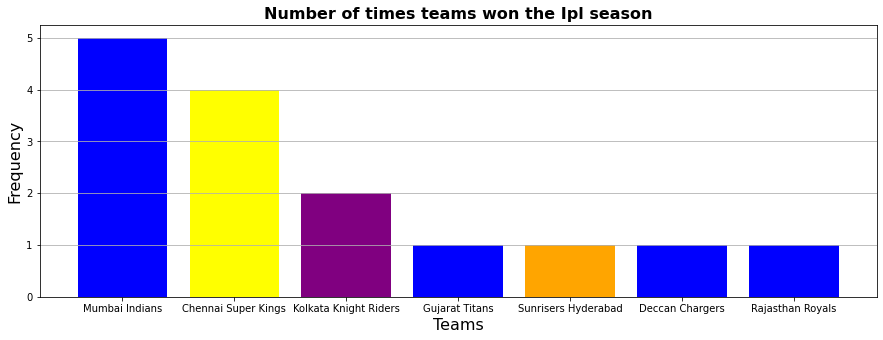

In [19]:
plt.figure(figsize=(15,5))
plt.xlabel('Teams',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.grid(visible=True,axis='y')
plt.title('Number of times teams won the Ipl season',fontsize=16,fontweight='bold')
plt.bar(final['WinningTeam'].value_counts().keys(),final['WinningTeam'].value_counts(),color=['blue','yellow','purple','blue','orange','blue','blue'])
plt.show()

Analysis: So from this graph we can see that MI have won the maximum times the Ipl season followed by CSK.

### Seeing the decision of the capatains after winning the toss

In [20]:
ipl['TossDecision'].value_counts()

field    599
bat      351
Name: TossDecision, dtype: int64

### Pie Chart showing Toss decision 

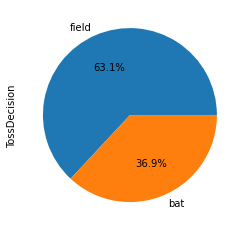

In [21]:
ipl['TossDecision'].value_counts().plot(kind='pie',autopct='%0.01f%%')
plt.show()

Analysis: For 63.1% of the times the toss winner decided to do fielding

#### Finding out how many times a team won after winning the toss

In [22]:
ipl[ipl['TossWinner']==ipl['WinningTeam']]['WinningTeam'].count()

489

finding out in percentage

In [23]:
(489/950)*100

51.473684210526315

Analysis: So only 51.47% times a toss winner became the winning team.

## Extracting the records where a team won batting first 

In [24]:
batting_first= ipl[ipl['WonBy']== 'Runs']

#### Looking at the first five records of the batting_first data

In [25]:
batting_first.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
8,1304112,Navi Mumbai,2022-05-18,2022,66,Lucknow Super Giants,Kolkata Knight Riders,"Dr DY Patil Sports Academy, Mumbai",Lucknow Super Giants,bat,N,Lucknow Super Giants,Runs,2.0,NaN,Q de Kock,"['Q de Kock', 'KL Rahul', 'E Lewis', 'DJ Hooda...","['VR Iyer', 'A Tomar', 'N Rana', 'SS Iyer', 'S...",R Pandit,YC Barde
9,1304111,Mumbai,2022-05-17,2022,65,Sunrisers Hyderabad,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,N,Sunrisers Hyderabad,Runs,3.0,NaN,RA Tripathi,"['Abhishek Sharma', 'PK Garg', 'RA Tripathi', ...","['RG Sharma', 'Ishan Kishan', 'DR Sams', 'Tila...",CB Gaffaney,N Pandit
10,1304110,Navi Mumbai,2022-05-16,2022,64,Delhi Capitals,Kings XI Punjab,"Dr DY Patil Sports Academy, Mumbai",Kings XI Punjab,field,N,Delhi Capitals,Runs,17.0,NaN,SN Thakur,"['DA Warner', 'SN Khan', 'MR Marsh', 'Lalit Ya...","['JM Bairstow', 'S Dhawan', 'PBB Rajapaksa', '...",GR Sadashiv Iyer,Nitin Menon
11,1304109,Mumbai,2022-05-15,2022,63,Rajasthan Royals,Lucknow Super Giants,"Brabourne Stadium, Mumbai",Rajasthan Royals,bat,N,Rajasthan Royals,Runs,24.0,NaN,TA Boult,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['Q de Kock', 'KL Rahul', 'A Badoni', 'DJ Hood...",PG Pathak,Tapan Sharma


# Histogram of won by runs margin

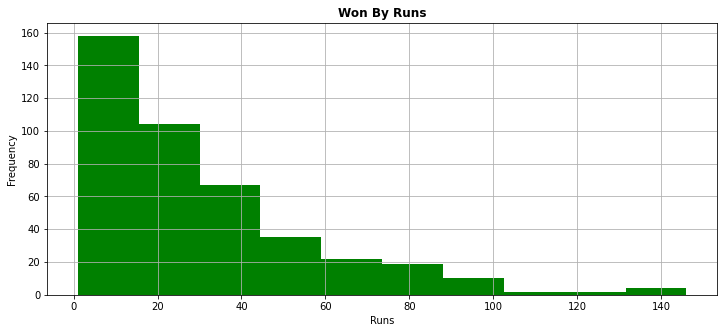

In [26]:
plt.figure(figsize=(12,5))
plt.grid(visible=True)
plt.hist(batting_first['Margin'],color='green')
plt.title('Won By Runs',fontweight='bold')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

 Analysis: Maximum number of times teams won by runs is between 1 to 20.



# Seeing which team won maximum number of times batting first




In [27]:
batting_first['WinningTeam'].value_counts()

Mumbai Indians                 66
Chennai Super Kings            61
Royal Challengers Bangalore    48
Kings XI Punjab                47
Kolkata Knight Riders          45
Delhi Capitals                 38
Rajasthan Royals               37
Sunrisers Hyderabad            36
Deccan Chargers                18
Rising Pune Supergiants        13
Lucknow Super Giants            7
Gujarat Titans                  4
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: WinningTeam, dtype: int64

# Making bar plot of the top 5 team winning after batting first maximum number of times

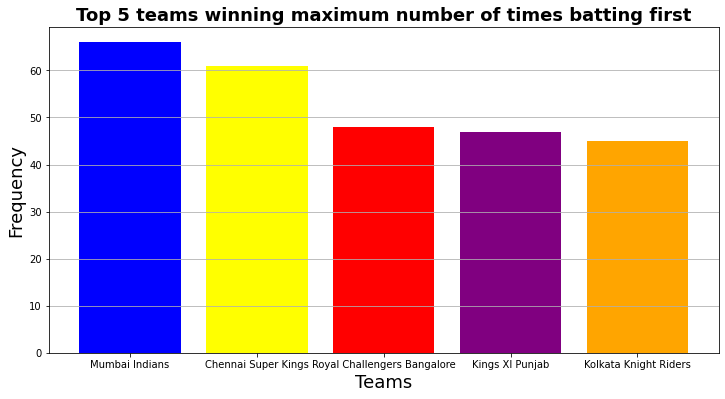

In [28]:
plt.figure(figsize=(12,6))
plt.grid(visible=True,axis='y')
plt.xlabel('Teams',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.title("Top 5 teams winning maximum number of times batting first",fontsize=18,fontweight='bold')
plt.bar(batting_first["WinningTeam"].value_counts()[0:5].keys(),batting_first["WinningTeam"].value_counts()[0:5],color=['blue','yellow','red','purple','orange'])
plt.show()

Analysis:  So we can see from the bar plot that MI won the maximum number of times batting first in IPL

## Extracting those records where a team won batting second

In [29]:
batting_second=ipl[ipl['WonBy']=='Wickets']

## Seeing first five records of batting_second data

In [30]:
batting_second.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Kings XI Punjab,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Kings XI Punjab,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
5,1304115,Mumbai,2022-05-21,2022,69,Delhi Capitals,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,N,Mumbai Indians,Wickets,5.0,NaN,JJ Bumrah,"['PP Shaw', 'DA Warner', 'MR Marsh', 'RR Pant'...","['Ishan Kishan', 'RG Sharma', 'D Brevis', 'Til...",Nitin Menon,Tapan Sharma


### Making histogram for frequency of wins w.r.t number of wickets


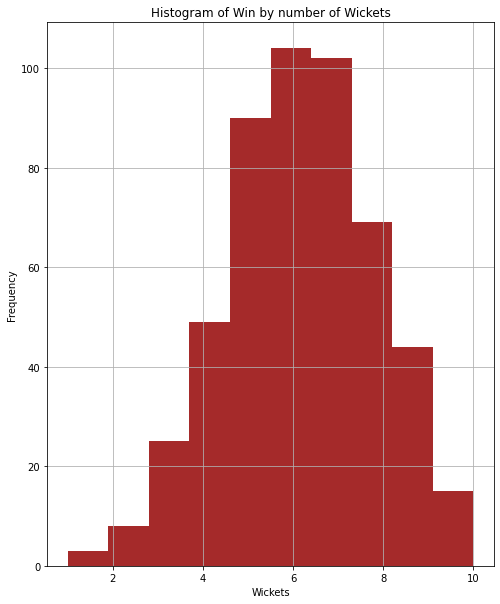

In [31]:
plt.figure(figsize=(8,10))
plt.grid(visible=True)
plt.hist(batting_second['Margin'],color='brown')
plt.title('Histogram of Win by number of Wickets')
plt.xlabel("Wickets")
plt.ylabel('Frequency')
plt.show()

Analysis:  By 6 wickets remaining the maximum times the teams have won the match. Very few times only the teams have won with 1 wicket only.

## Finding the frequency of win of teams batting second

In [32]:
batting_second['WinningTeam'].value_counts()

Kolkata Knight Riders          68
Mumbai Indians                 63
Delhi Capitals                 62
Chennai Super Kings            60
Royal Challengers Bangalore    59
Rajasthan Royals               57
Kings XI Punjab                51
Sunrisers Hyderabad            38
Rising Pune Supergiants        14
Gujarat Lions                  12
Deccan Chargers                11
Gujarat Titans                  8
Kochi Tuskers Kerala            4
Lucknow Super Giants            2
Name: WinningTeam, dtype: int64

## Making bar plot of the top five team winning matches batting second

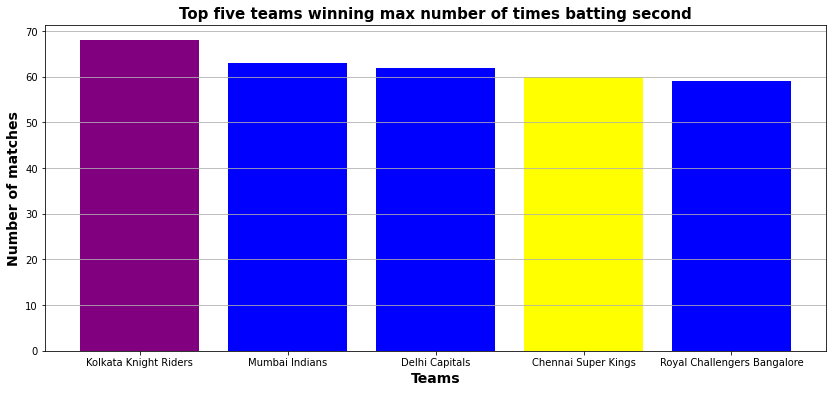

In [33]:
plt.figure(figsize=(14,6))
plt.grid(visible=True,axis='y')
plt.bar(batting_second['WinningTeam'].value_counts()[0:5].keys(),batting_second['WinningTeam'].value_counts()[0:5],color=['purple','blue','blue','yellow','blue'])
plt.xlabel('Teams',fontsize=14,fontweight='bold')
plt.ylabel('Number of matches',fontsize=14,fontweight='bold')
plt.title('Top five teams winning max number of times batting second',fontweight='bold',fontsize=15)
plt.show()

Analysis: KKR have won the maximum number of times batting second followed by MI and the DC.

### Seeing number of matches played in each season

In [34]:
Sea=ipl['Season'].value_counts().reset_index()
Sea.sort_values('index',inplace=True)
Sea

,index,Season
13,2007/08,58
14,2009,57
10,2009/10,60
3,2011,73
2,2012,74
0,2013,76
9,2014,60
12,2015,59
8,2016,60
11,2017,59


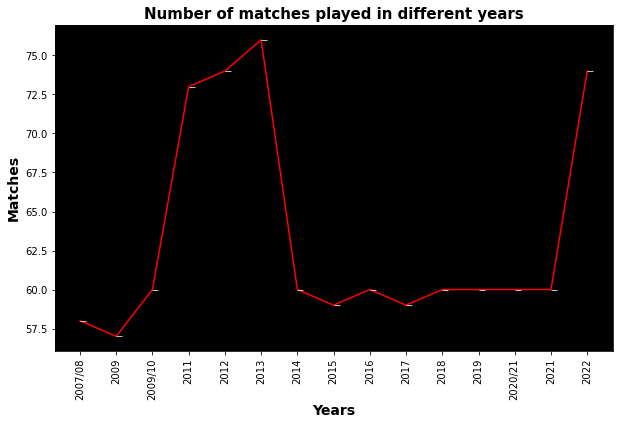

In [35]:
plt.figure(figsize=(10,6))
ax=plt.axes()
ax.set(facecolor='black')
plt.xticks(rotation=90)
sns.lineplot(x='index', y= 'Season',color='red',data=Sea,marker=True)
plt.xlabel('Years',fontsize=14,fontweight='bold')
plt.ylabel('Matches',fontsize=14,fontweight='bold')
plt.title('Number of matches played in different years',fontsize=15,fontweight='bold')
plt.show()

Analysis: Maximum number of matches have been played in 2013 followed by 2012 and least number of matches have been played in 2009.

### Counting number of matches played in each city

In [36]:
ipl['City'].value_counts()

Mumbai            159
Kolkata            79
Delhi              78
Chennai            67
Bangalore          65
Hyderabad          64
Chandigarh         56
Pune               51
Jaipur             47
Abu Dhabi          37
Ahmedabad          19
Bengaluru          15
Durban             15
Visakhapatnam      13
Dubai              13
Centurion          12
Rajkot             10
Sharjah            10
Dharamsala          9
Navi Mumbai         9
Indore              9
Johannesburg        8
Ranchi              7
Cuttack             7
Port Elizabeth      7
Cape Town           7
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: City, dtype: int64

# Total number of matches played by Teams in IPL

In [37]:
matches=(ipl['Team1'].value_counts()+ipl['Team2'].value_counts()).sort_values(ascending=False)
matches

Mumbai Indians                 231
Royal Challengers Bangalore    226
Delhi Capitals                 224
Kolkata Knight Riders          223
Kings XI Punjab                218
Chennai Super Kings            208
Rajasthan Royals               192
Sunrisers Hyderabad            152
Rising Pune Supergiants         76
Deccan Chargers                 75
Gujarat Lions                   30
Gujarat Titans                  16
Lucknow Super Giants            15
Kochi Tuskers Kerala            14
dtype: int64

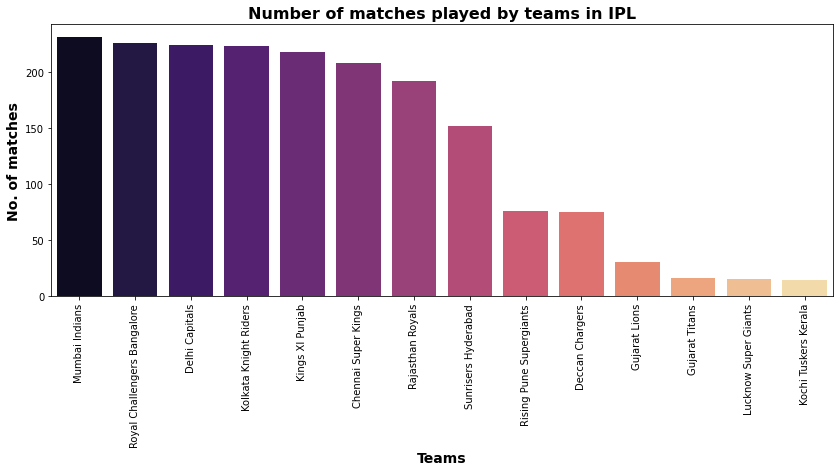

In [38]:
plt.figure(figsize=(14,5))
sns.barplot(x=matches.index,y=matches,palette='magma')
plt.xticks(rotation=90)
plt.xlabel('Teams',fontsize=14,fontweight='bold')
plt.ylabel('No. of matches',fontsize=14,fontweight='bold')
plt.title('Number of matches played by teams in IPL',fontsize=16,fontweight='bold')
plt.show()

Analysis: MI have played maximum number of matches followed by RCB and DC

# Importing dataset of all deliveries in IPl till data

In [39]:
deliveries=pd.read_csv('ipl_ball_by_ball_2008_2022.csv')

##### Looking into the first 3 records of deliveries dataset

In [40]:
deliveries.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [41]:
deliveries['BattingTeam'].unique()

array(['Rajasthan Royals', 'Gujarat Titans',
       'Royal Challengers Bangalore', 'Lucknow Super Giants',
       'Sunrisers Hyderabad', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Delhi Daredevils', 'Rising Pune Supergiant',
       'Gujarat Lions', 'Rising Pune Supergiants', 'Pune Warriors',
       'Deccan Chargers', 'Kochi Tuskers Kerala'], dtype=object)

##### Made function to convert the old name of the teams into new names so that clear picture of the analysis is there.

In [44]:
def change_nam(x):
    if x=='Punjab Kings':
        return 'Kings XI Punjab'
    elif x== 'Rising Pune Supergiant':
        return 'Rising Pune Supergiants'
    elif x=='Pune Warriors':
        return 'Rising Pune Supergiant'
    elif x== 'Delhi Daredevils':
        return 'Delhi Capitals'
    else:
        return x
deliveries['BattingTeam']=deliveries['BattingTeam'].apply(change_nam)

In [45]:
deliveries["BattingTeam"].unique()

array(['Rajasthan Royals', 'Gujarat Titans',
       'Royal Challengers Bangalore', 'Lucknow Super Giants',
       'Sunrisers Hyderabad', 'Kings XI Punjab', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Rising Pune Supergiants', 'Gujarat Lions', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [46]:
ipl.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Kings XI Punjab,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Kings XI Punjab,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [47]:
match=ipl[['ID','Season']].merge(deliveries,left_on='ID',right_on="ID",how='left').drop('ID',axis=1)
match.head(120)

,Season,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,2022,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,2022,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,2022,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,2022,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,2022,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2022,1,19,2,R Parag,Mohammed Shami,OC McCoy,NaN,2,0,2,0,0,NaN,NaN,NaN,Rajasthan Royals
116,2022,1,19,3,R Parag,Mohammed Shami,OC McCoy,NaN,4,0,4,0,0,NaN,NaN,NaN,Rajasthan Royals
117,2022,1,19,4,R Parag,Mohammed Shami,OC McCoy,NaN,1,0,1,0,1,OC McCoy,run out,R Tewatia,Rajasthan Royals
118,2022,1,19,5,R Parag,Mohammed Shami,M Prasidh Krishna,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [48]:
m=match[match['batsman_run']==6]
m

,Season,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
16,2022,1,2,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,6,0,6,0,0,NaN,NaN,NaN,Rajasthan Royals
22,2022,1,3,5,YBK Jaiswal,Yash Dayal,JC Buttler,NaN,6,0,6,0,0,NaN,NaN,NaN,Rajasthan Royals
103,2022,1,17,2,TA Boult,R Sai Kishore,R Parag,NaN,6,0,6,0,0,NaN,NaN,NaN,Rajasthan Royals
107,2022,1,17,6,OC McCoy,R Sai Kishore,R Parag,NaN,6,0,6,0,0,NaN,NaN,NaN,Rajasthan Royals
142,2022,2,3,5,MS Wade,M Prasidh Krishna,Shubman Gill,NaN,6,0,6,0,0,NaN,NaN,NaN,Gujarat Titans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225848,2007/08,1,19,2,BB McCullum,P Kumar,Mohammad Hafeez,NaN,6,0,6,0,0,NaN,NaN,NaN,Kolkata Knight Riders
225852,2007/08,1,19,6,BB McCullum,P Kumar,Mohammad Hafeez,NaN,6,0,6,0,0,NaN,NaN,NaN,Kolkata Knight Riders
225882,2007/08,2,4,4,JH Kallis,AB Agarkar,W Jaffer,NaN,6,0,6,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225932,2007/08,2,12,1,P Kumar,LR Shukla,Z Khan,NaN,6,0,6,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [49]:
six=m['BattingTeam'].value_counts().reset_index()
six

,index,BattingTeam
0,Mumbai Indians,1412
1,Royal Challengers Bangalore,1381
2,Kings XI Punjab,1278
3,Chennai Super Kings,1269
4,Kolkata Knight Riders,1229
5,Delhi Capitals,1149
6,Rajasthan Royals,1013
7,Sunrisers Hyderabad,780
8,Deccan Chargers,400
9,Rising Pune Supergiants,353


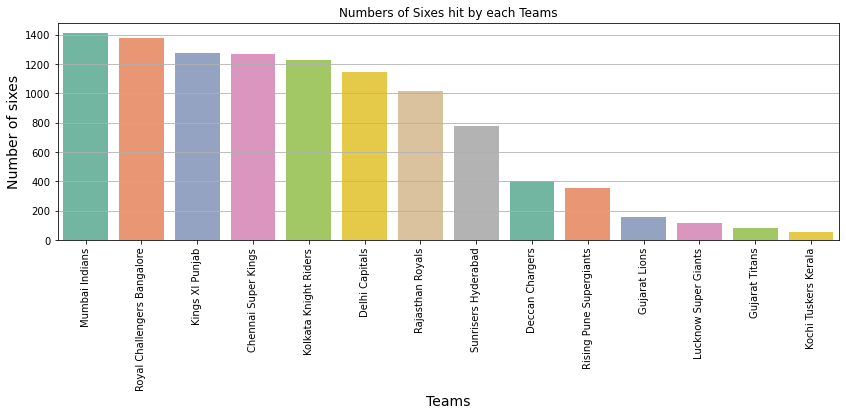

In [50]:
plt.figure(figsize=(14,4))
plt.xticks(rotation=90)
plt.grid(visible=True)
sns.barplot(x=six['index'],y=six['BattingTeam'],palette='Set2')
plt.xlabel('Teams',fontsize=14)
plt.ylabel('Number of sixes',fontsize=14)
plt.title('Numbers of Sixes hit by each Teams')
plt.show()

Analysis: MI have hit the maximum number of sixes followed by RCB and KXIPunjab.

In [51]:
runs=deliveries.groupby('batter')
runs=runs['batsman_run'].sum().sort_values(ascending=False)
run=runs.head(10)
run

batter
V Kohli           6634
S Dhawan          6244
DA Warner         5883
RG Sharma         5881
SK Raina          5536
AB de Villiers    5181
CH Gayle          4997
MS Dhoni          4978
RV Uthappa        4954
KD Karthik        4377
Name: batsman_run, dtype: int64

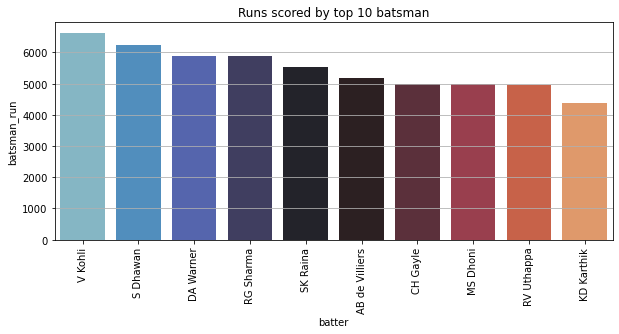

In [52]:
plt.figure(figsize=(10,4))
plt.grid(visible=True)
sns.barplot(x=run.index,y=run,palette='icefire')
plt.xticks(rotation=90)
plt.title('Runs scored by top 10 batsman')
plt.show()

Analysis: So from the bar plot we get the inference that V Kholi has scored the maximum number of runs in all the IPL so far followed by S Dhawan.

In [53]:
all_batsman=deliveries.groupby('batter')['batsman_run'].count() # this is counting number of balls played by batter
all_batsman

batter
A Ashish Reddy     196
A Badoni           139
A Chandila           7
A Chopra            75
A Choudhary         20
                  ... 
Yash Dayal           1
Yashpal Singh       67
Younis Khan          7
Yuvraj Singh      2207
Z Khan             141
Name: batsman_run, Length: 605, dtype: int64

In [54]:
x=all_batsman>300
x

batter
A Ashish Reddy    False
A Badoni          False
A Chandila        False
A Chopra          False
A Choudhary       False
                  ...  
Yash Dayal        False
Yashpal Singh     False
Younis Khan       False
Yuvraj Singh       True
Z Khan            False
Name: batsman_run, Length: 605, dtype: bool

In [55]:
batsman_list=all_batsman[x].index.tolist()

In [56]:
final=deliveries[deliveries['batter'].isin(batsman_list)]
runs=final.groupby('batter')['batsman_run'].sum()
balls=final.groupby('batter')['batsman_run'].count()
sr=(runs/balls)*100
sr=sr.reset_index()

In [57]:
sr1=sr.sort_values('batsman_run',ascending=False).head(10)

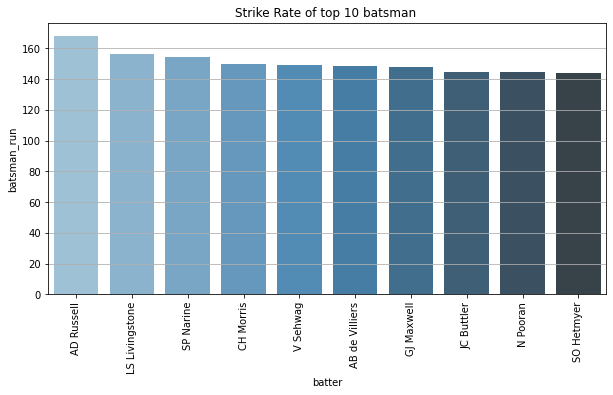

In [58]:
plt.figure(figsize=(10,5))
plt.grid(visible=True)
plt.xticks(rotation=90)
sns.barplot(x='batter',y='batsman_run',data=sr1,palette='Blues_d')
plt.title('Strike Rate of top 10 batsman ')
plt.show()

Analysis: AD Russell has the best Strike Rate in the IPL

# Orange cap holder in each season


In [59]:
orange=match.groupby(['Season','batter'])['batsman_run'].sum().sort_values(ascending=False).reset_index().drop_duplicates('Season').sort_values('Season')
orange

,Season,batter,batsman_run
20,2007/08,SE Marsh,616
27,2009,ML Hayden,572
18,2009/10,SR Tendulkar,618
22,2011,CH Gayle,608
5,2012,CH Gayle,733
4,2013,MEK Hussey,733
11,2014,RV Uthappa,660
31,2015,DA Warner,562
0,2016,V Kohli,973
13,2017,DA Warner,641


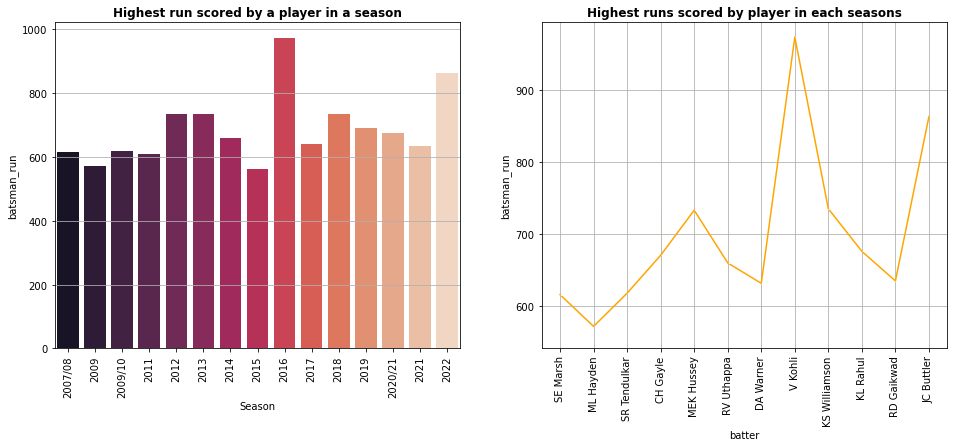

In [60]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.grid(visible=True)
plt.xticks(rotation=90)
sns.barplot(x='Season',y='batsman_run',data=orange,palette='rocket')
plt.title('Highest run scored by a player in a season',fontweight='bold')

plt.subplot(1,2,2)
plt.grid(visible=True)
plt.xticks(rotation=90)
sns.lineplot(x='batter',y='batsman_run',data=orange,color='orange',marker=True)
plt.title("Highest runs scored by player in each seasons",fontweight='bold')
plt.show()

Analysis: In 2016 V Kholi scored the maximum number of runs(973) by an individual player in the history of the IPL tournament.

In [61]:
purple=match.groupby(['Season','bowler'])['isWicketDelivery'].sum().sort_values(ascending=False).reset_index().drop_duplicates('Season').sort_values('Season')
purple

,Season,bowler,isWicketDelivery
26,2007/08,Sohail Tanvir,24
18,2009,RP Singh,26
43,2009/10,PP Ojha,22
6,2011,SL Malinga,30
4,2012,M Morkel,30
1,2013,DJ Bravo,34
21,2014,MM Sharma,26
11,2015,DJ Bravo,28
29,2016,B Kumar,24
12,2017,B Kumar,28


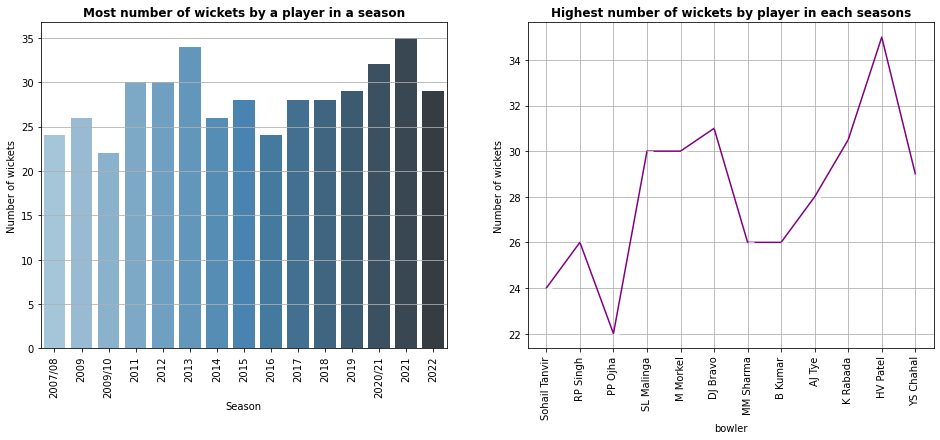

In [62]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.grid(visible=True)
plt.xticks(rotation=90)
sns.barplot(x='Season',y='isWicketDelivery',data=purple,palette='Blues_d')
plt.ylabel('Number of wickets')
plt.title('Most number of wickets by a player in a season',fontweight='bold')

plt.subplot(1,2,2)
plt.grid(visible=True)
plt.xticks(rotation=90)
sns.lineplot(x='bowler',y='isWicketDelivery',data=purple,color='purple',marker=True)
plt.ylabel('Number of wickets')
plt.title("Highest number of wickets by player in each seasons",fontweight='bold')
plt.show()

Analysis: In 2021 HV Patel took the maximum number of wickets(35) in the history of the IPL tournament. 

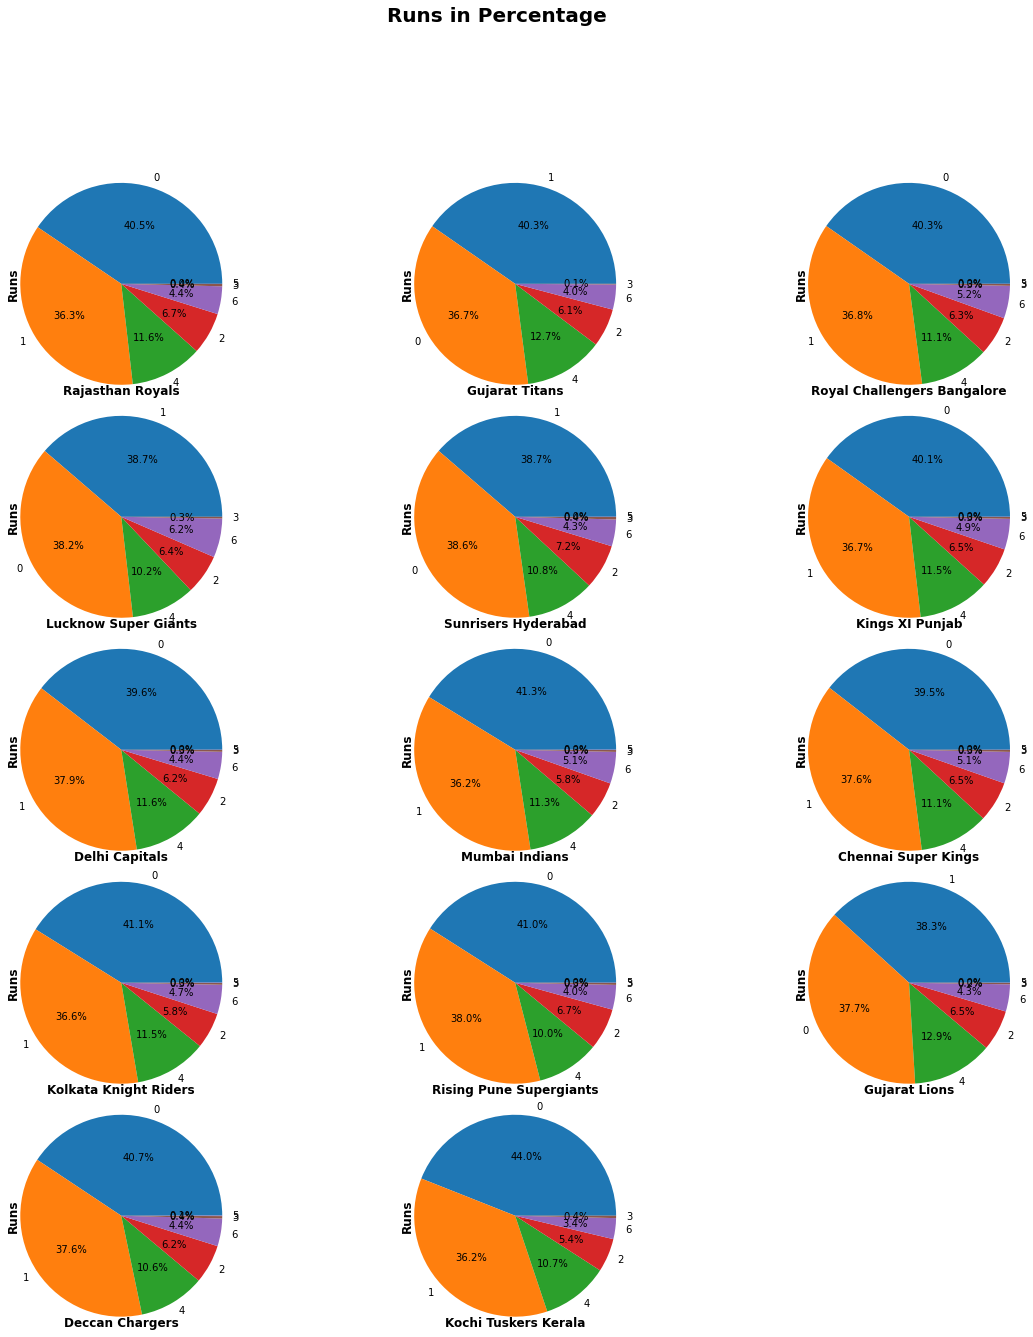

In [64]:
plt.figure(figsize=(20,25))
l1=list(deliveries['BattingTeam'].unique())
for i in range (0,len(l1)):
    plt.subplot(6,3,i+1)
    deliveries[deliveries['BattingTeam']==l1[i]]['batsman_run'].value_counts().plot.pie(autopct='%0.01f%%',radius=1.3)
    plt.xlabel(l1[i],fontweight='bold',fontsize=12)
    plt.ylabel('Runs',fontweight='bold',fontsize=12)
plt.suptitle('Runs in Percentage',size=20,weight='bold')
plt.show()

Contribution of 1's, 2's, 3's, 4's, 5's(in rare ocassions), 6's in total scores of different IPL teams including the % of dot balls faced by them.